In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

Global variables.

In [2]:
PATH_TO_CSV = pathlib.Path('/home/relogu/Desktop/OneDrive/UNIBO/Magistrale/Federated Learning Project/ray_results')
COLORS_DICT = {
    'sgd': 'blue',
    'adam': 'orange',
    'yogi': 'green',
}
BATCH_DICT = {
    8: 'blue',
    16: 'orange',
    32: 'green',
    64: 'red',
}
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

Learning rate for each optimizer, for each architecture, with and without lr scheduler.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


         lr linears optimizer  ray/tune/ae_loss  ray/tune/time_this_iter_s  \
0  0.010541     dec      adam          0.041264                   2.373628   
1  0.000030  google      adam          0.009010                   1.614316   
2  0.000015  curves      adam          0.016189                   1.352930   
3  0.000054     dec      yogi          0.007280                   1.941222   
4  0.000048  google      yogi          0.009763                   1.820733   

   ray/tune/done  ray/tune/time_since_restore  \
0            0.0                   356.949982   
1            0.0                   278.782257   
2            0.0                   251.018158   
3            0.0                   344.128326   
4            0.0                   281.543671   

   ray/tune/timesteps_since_restore  scheduler  
0                               0.0  scheduler  
1                               0.0  scheduler  
2                               0.0  scheduler  
3                               0.0  sch

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


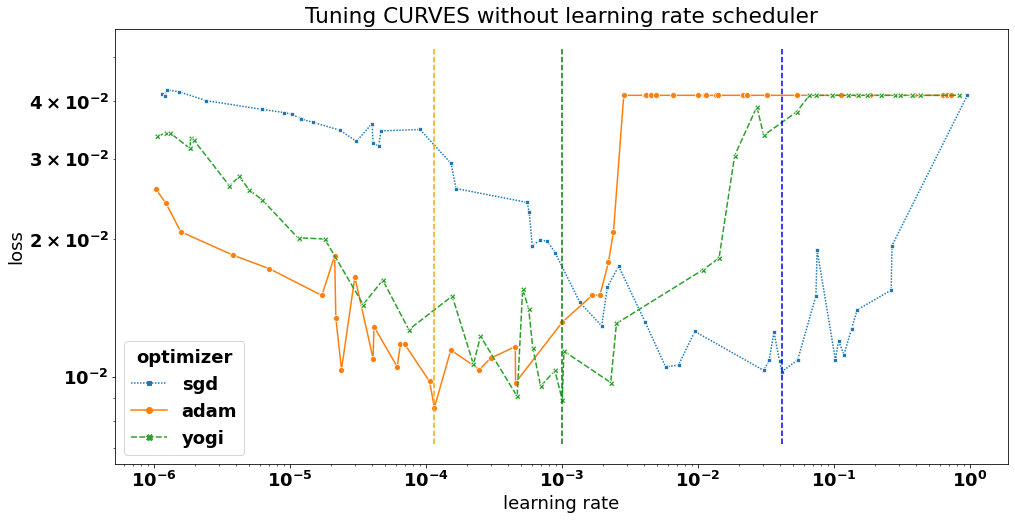

linears curves, OPT adam, sched scheduler, min loss 0.0099812448024749 at lr 0.0001804710738933
linears curves, OPT sgd, sched scheduler, min loss 0.010334525257349 at lr 0.0372772450079496
linears curves, OPT yogi, sched scheduler, min loss 0.010301842354238 at lr 0.0020484524918079


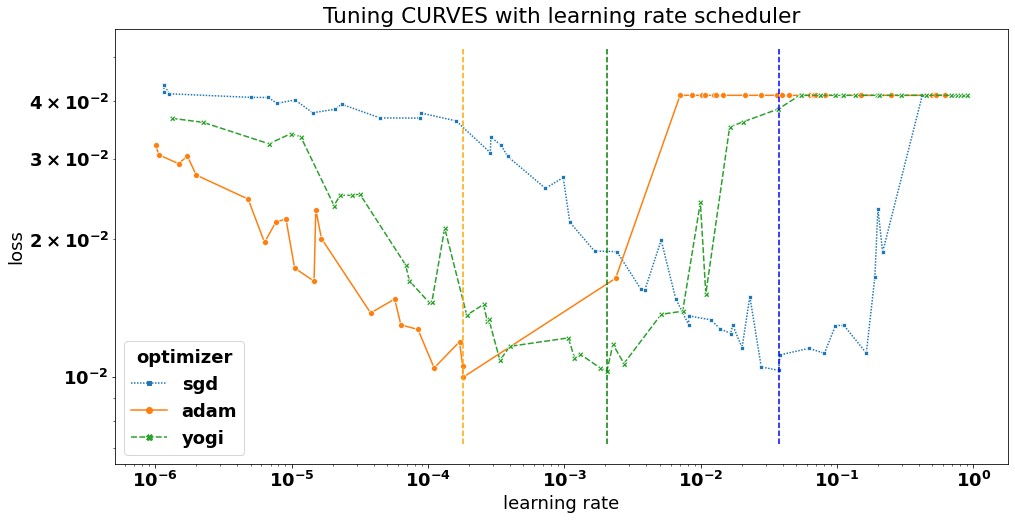

linears dec, OPT adam, sched no_scheduler, min loss 0.0035451103467494 at lr 9.574326653752727e-05
linears dec, OPT sgd, sched no_scheduler, min loss 0.0040157092735171 at lr 0.0036292676490959
linears dec, OPT yogi, sched no_scheduler, min loss 0.0032364944927394 at lr 0.0009191151981251


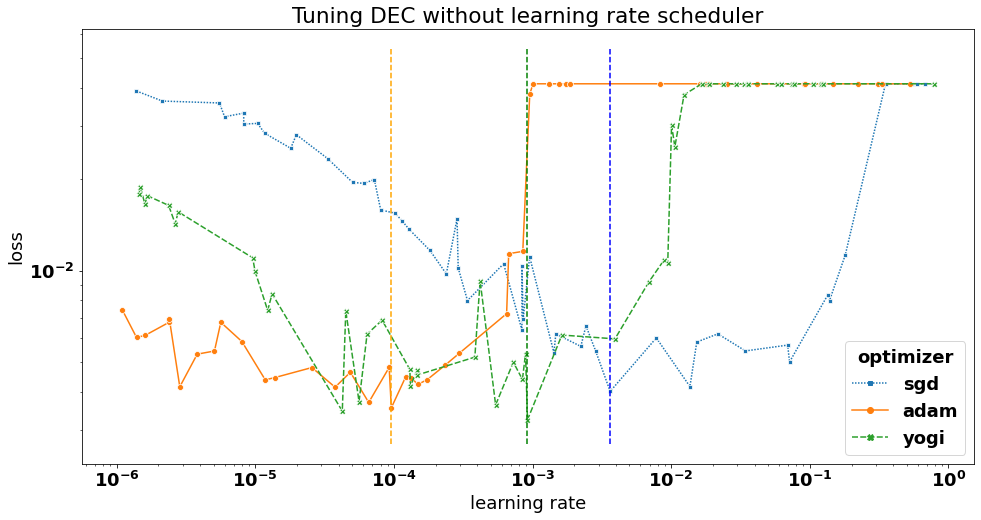

linears dec, OPT adam, sched scheduler, min loss 0.0041936789639294 at lr 9.701896013654905e-06
linears dec, OPT sgd, sched scheduler, min loss 0.0047324672341346 at lr 0.0080121583832127
linears dec, OPT yogi, sched scheduler, min loss 0.0038725414779037 at lr 0.0002501701680272


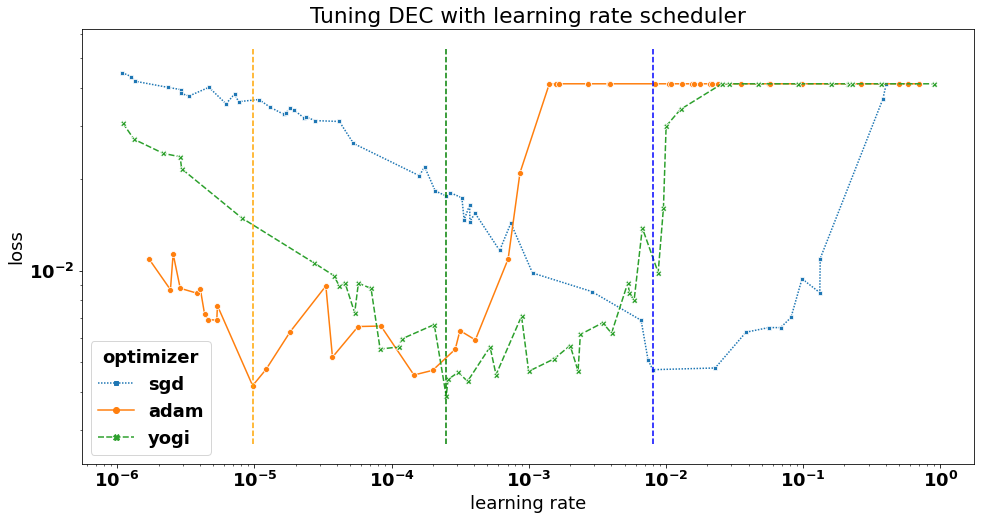

linears google, OPT adam, sched no_scheduler, min loss 0.0042217085137963 at lr 0.0001254463571323
linears google, OPT sgd, sched no_scheduler, min loss 0.0043212049640715 at lr 0.0064961634558085
linears google, OPT yogi, sched no_scheduler, min loss 0.0041847601532936 at lr 0.000755061886704


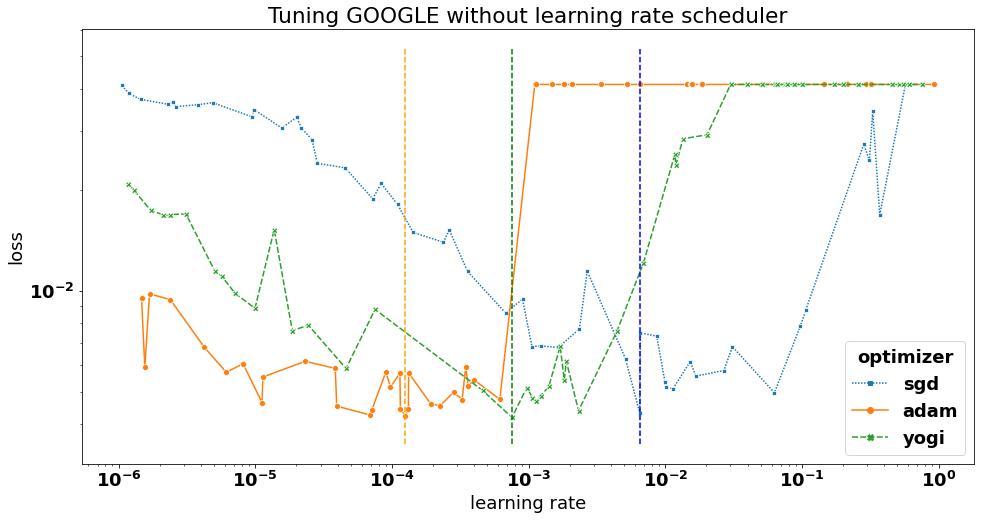

linears google, OPT adam, sched scheduler, min loss 0.0042875013314187 at lr 4.064072686768065e-05
linears google, OPT sgd, sched scheduler, min loss 0.0055148052051663 at lr 0.0140181410649615
linears google, OPT yogi, sched scheduler, min loss 0.0046896417625248 at lr 0.001422982060918


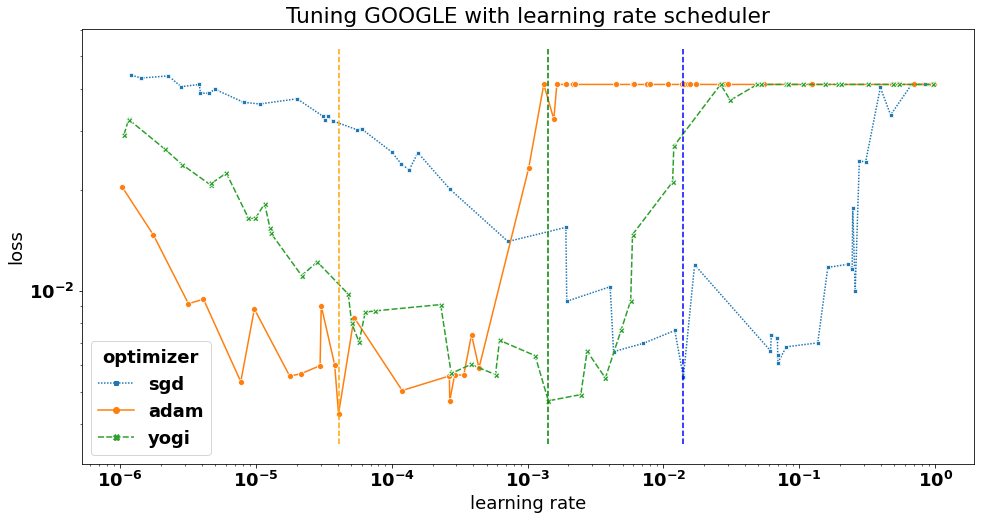

In [3]:
df = pd.DataFrame()
tmp = pd.read_csv(PATH_TO_CSV/'euromds_opt_arch.csv')
tmp['scheduler'] = 'scheduler'
df = df.append(tmp)
tmp = pd.read_csv(PATH_TO_CSV/'euromds_opt_arch_nosched.csv')
tmp['scheduler'] = 'no_scheduler'
df = df.append(tmp)
print(df.head())

euromds_best = pd.DataFrame()
columns = ['architecture', 'learning rate scheduler', 'optimizer', 'learning rate', 'final reconstruction loss']

i = 0
for linears in np.unique(df['linears']):
    current = df[df['linears'] == linears]
    for scheduler in np.unique(current['scheduler']):
        figure, ax = plt.subplots(1, 1, figsize=(16,8))
        tmp = current[current['scheduler'] == scheduler]
        # sns.scatterplot(data=tmp, x='lr', y='ray/tune/ae_loss', ax=ax,
        sns.lineplot(data=tmp, x='lr', y='ray/tune/ae_loss', ax=ax, markers=True, style='optimizer',
                        hue='optimizer' if len(np.unique(tmp['optimizer'])) > 1 else None,
                        hue_order=list(COLORS_DICT.keys()),
                        )
        for opt in np.unique(tmp['optimizer']):
            tmp1 = tmp[(tmp['optimizer'] == opt) & (tmp['linears'] == linears)]
            min_row = tmp1.loc[tmp1['ray/tune/ae_loss'].idxmin()]
            x = [min_row['lr'], min_row['lr']]
            y = [np.min(current['ray/tune/ae_loss'])/1.2, 1.2*np.max(current['ray/tune/ae_loss'])]
            ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
            # x = [1e-6, 1]
            # y = [np.min(tmp1['ray/tune/ae_loss']), np.min(tmp1['ray/tune/ae_loss'])]
            # ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
            print('linears {}, OPT {}, sched {}, min loss {} at lr {}'. \
                format(linears, opt, scheduler, np.min(tmp1['ray/tune/ae_loss']), min_row['lr']))
            euromds_best = euromds_best.append(pd.DataFrame([[
                linears.upper(),
                scheduler == 'scheduler',
                opt.upper(),
                min_row['lr'],
                np.min(tmp1['ray/tune/ae_loss']),
                ]],
                                     columns=columns))
        ax.set_xscale('log')
        ax.set_yscale('log')
        # ax.grid()
        ax.set_xlabel('learning rate')
        ax.set_ylabel('loss')
        ax.set_title('Tuning {} {} learning rate scheduler'. \
            format(
                linears.upper(),
                'with' if scheduler == 'scheduler' else 'without'
                ))
        plt.savefig('euromds_{}_opt_lr_{}.png'. \
            format(
                linears,
                'sched' if scheduler == 'scheduler' else 'nosched'
                ))
        plt.show()
        i+=1

plt.show()
euromds_best.to_csv('euromds_arch_opt_lr.csv')

Activations and batch sizes for each optimizer, for each architecture, without lr scheduler.

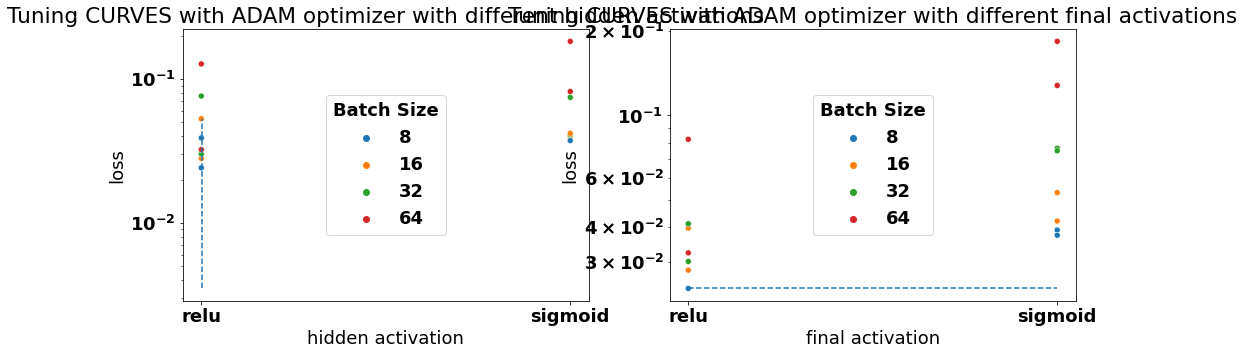

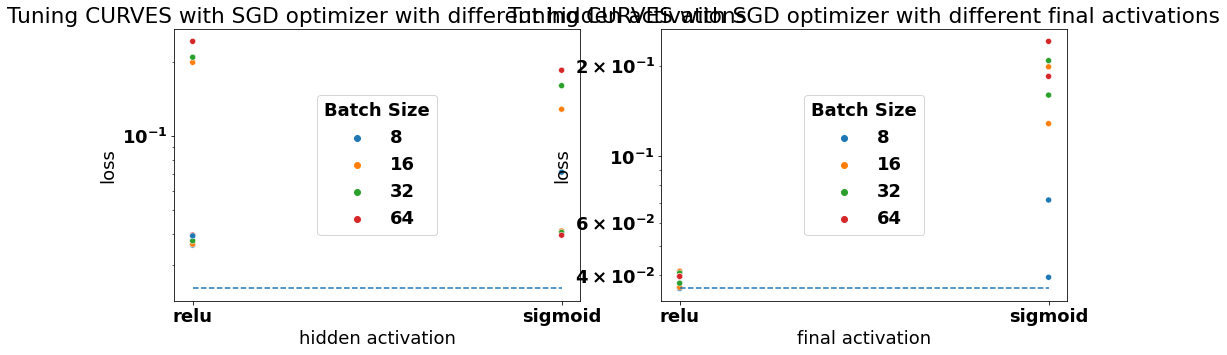

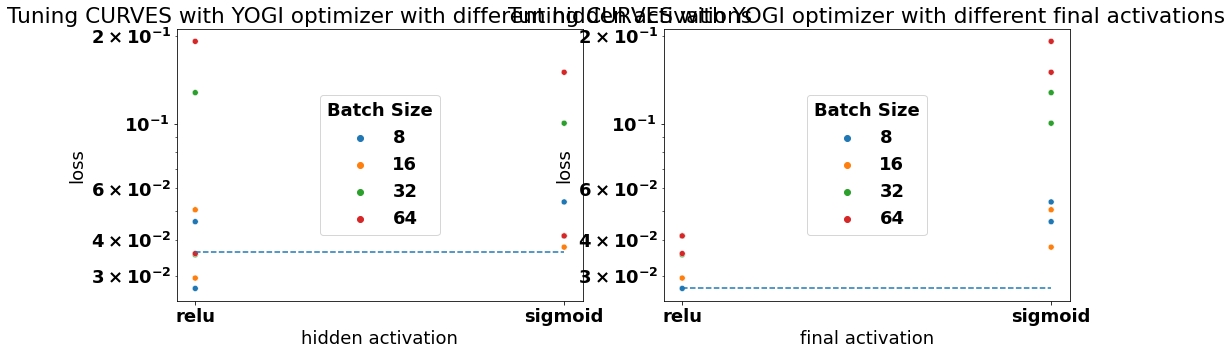

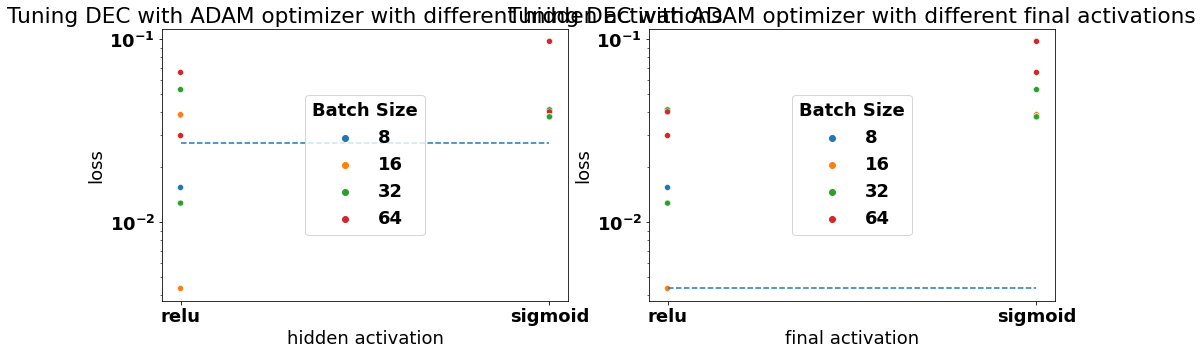

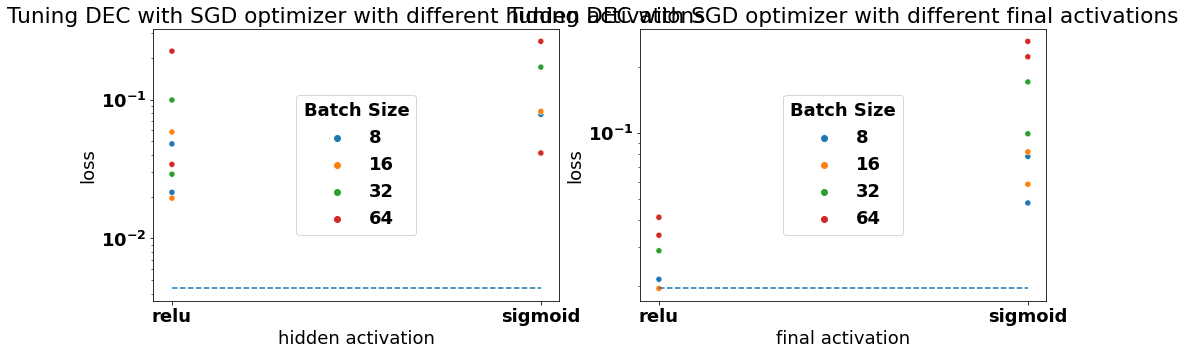

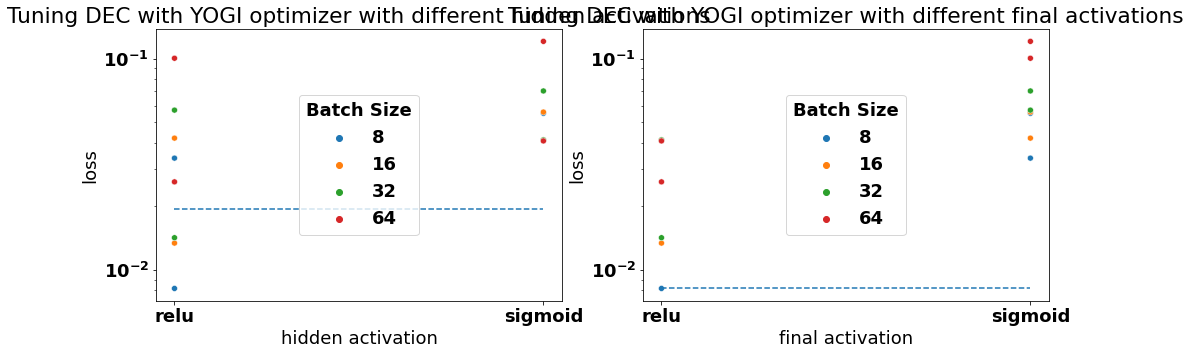

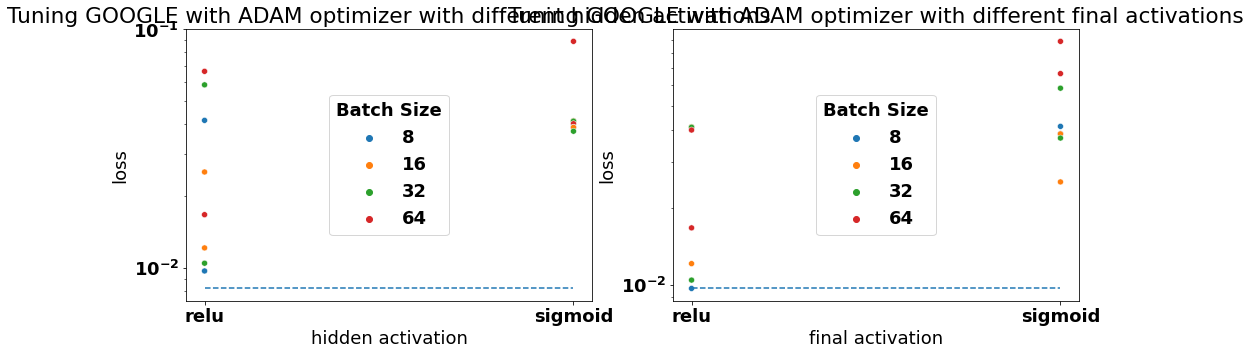

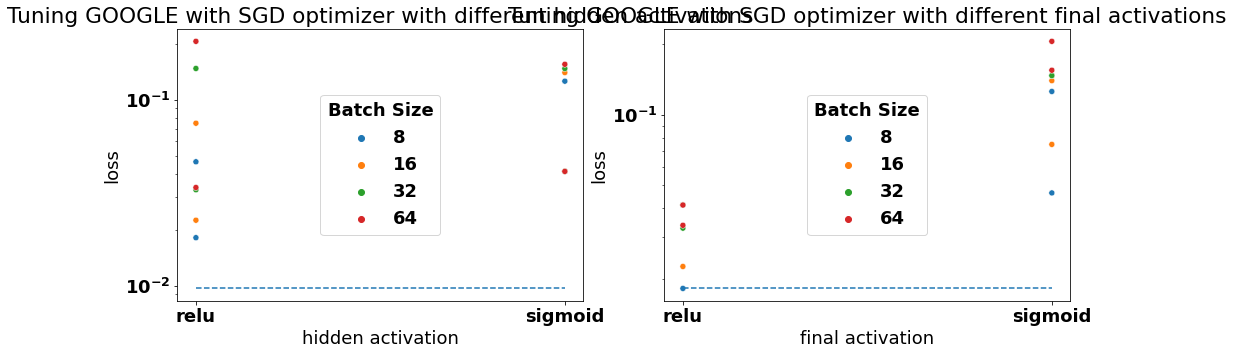

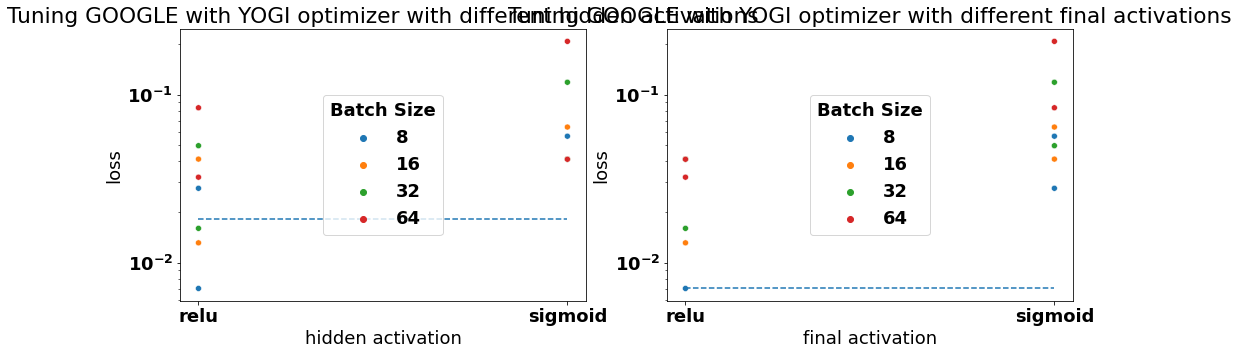

In [4]:
df = pd.read_csv(PATH_TO_CSV/'euromds_ae_arch_acts_batch_opts.csv')
df['ae_batch_size'] = df['ae_batch_size'].astype(int)
df['ae_batch_size'] = df['ae_batch_size'].astype('category')
df
euromds_best_1 = pd.DataFrame()
columns = ['architecture', 'optimizer', 'batch size', 'hidden activation', 'final activation', 'final reconstruction loss']

for linear in np.unique(df['linears']):
    for opt in np.unique(df['optimizer']):
        tmp = df[(df['linears']==linear)&(df['optimizer']==opt)]
        figure, axs = plt.subplots(1, 2, figsize=(16,5))
        ax = axs[0]
        g = sns.scatterplot(data=tmp, x='activation', y='ray/tune/ae_loss', ax=ax,
                        hue='ae_batch_size',
                        hue_order=list(BATCH_DICT.keys()),
                        )
        min_row = tmp.loc[tmp['ray/tune/ae_loss'].idxmin()]
        euromds_best_1 = euromds_best_1.append(pd.DataFrame([[
            linear.upper(),
            opt.upper(),
            min_row['ae_batch_size'],
            min_row['activation'],
            min_row['final_activation'],
            min_row['ray/tune/ae_loss'],
            ]],
                                    columns=columns))
        # x = ['relu', 'sigmoid']
        # y = [np.min(tmp['ray/tune/ae_loss']), np.min(tmp['ray/tune/ae_loss'])]
        ax.plot(x, y, linestyle='--')
        ax.set_yscale('log')
        # ax.grid()
        ax.set_xlabel('hidden activation')
        ax.set_ylabel('loss')
        ax.set_title('Tuning {} with {} optimizer with different hidden activations'. \
            format(
                linear.upper(),
                opt.upper(),
                ))
        sns.move_legend(g, "center", title='Batch Size')
        ax = axs[1]
        g = sns.scatterplot(data=tmp, x='final_activation', y='ray/tune/ae_loss', ax=ax,
                        hue='ae_batch_size',
                        hue_order=list(BATCH_DICT.keys()),
                        )
        min_row = tmp.loc[tmp['ray/tune/ae_loss'].idxmin()]
        x = ['relu', 'sigmoid']
        y = [np.min(tmp['ray/tune/ae_loss']), np.min(tmp['ray/tune/ae_loss'])]
        ax.plot(x, y, linestyle='--')
        ax.set_yscale('log')
        # ax.grid()
        ax.set_xlabel('final activation')
        ax.set_ylabel('loss')
        ax.set_title('Tuning {} with {} optimizer with different final activations'. \
            format(
                linear.upper(),
                opt.upper(),
                ))
        sns.move_legend(g, "center", title='Batch Size')
euromds_best_1.to_csv('euromds_best_batch.csv')

Tuning for modified loss.

linears curves, OPT adam, min loss 0.0123108578845858 at beta 0.1009968685528718
linears curves, OPT sgd, min loss 0.0138595625758171 at beta 0.0200371638135039
linears curves, OPT yogi, min loss 0.0119145214557647 at beta 0.1799538709452853


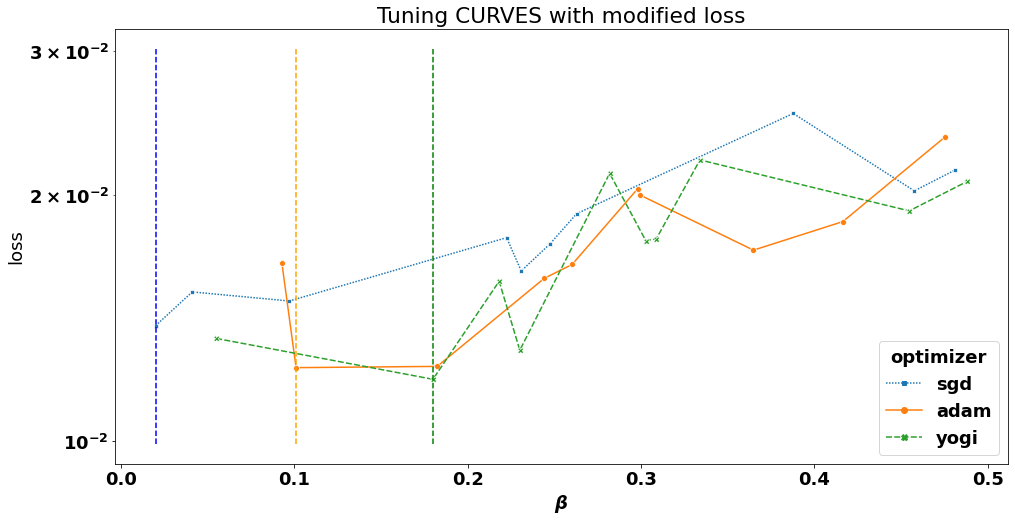

linears dec, OPT adam, min loss 0.005005536135286 at beta 0.1809011403708695
linears dec, OPT sgd, min loss 0.0054639531299471 at beta 0.0461409921490773
linears dec, OPT yogi, min loss 0.0039814780466258 at beta 0.0160954225777041


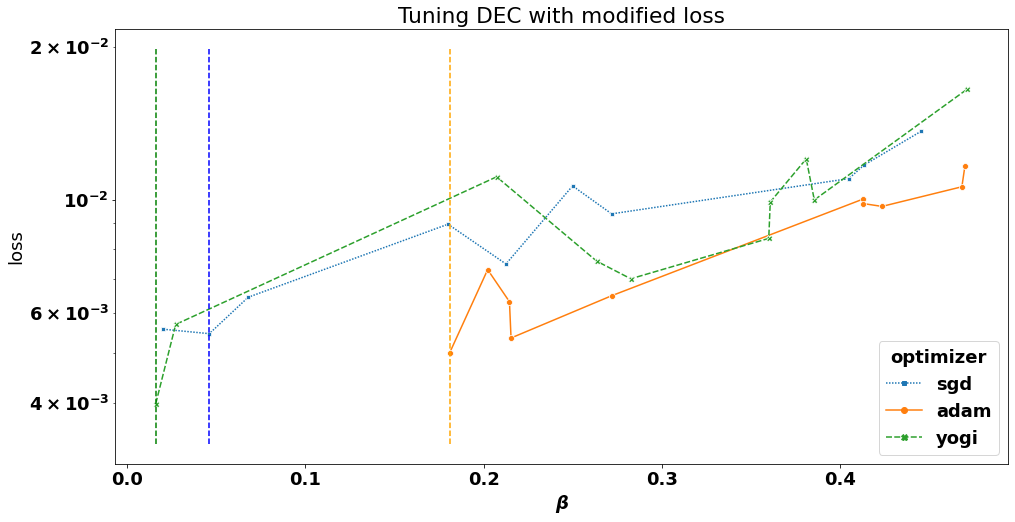

linears google, OPT adam, min loss 0.005889959167689 at beta 0.175979988057393
linears google, OPT sgd, min loss 0.0057761003263294 at beta 0.0158962252289224
linears google, OPT yogi, min loss 0.004778629168868 at beta 0.0030857800184892


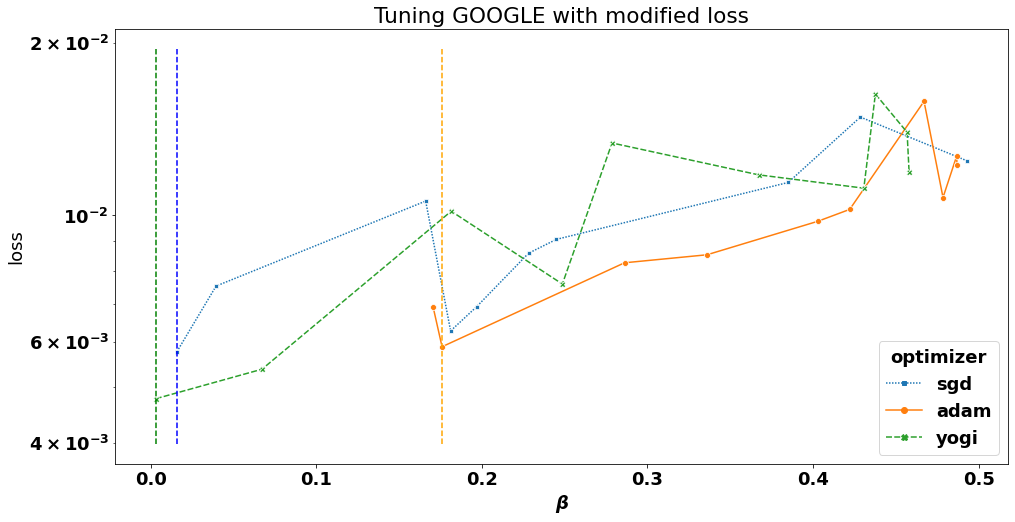

In [5]:
df = pd.read_csv(PATH_TO_CSV/'euromds_ae_modloss.csv')
df.head()
euromds_best = pd.DataFrame()
columns = ['architecture', 'beta', 'optimizer', 'final reconstruction loss']

i = 0
for linears in np.unique(df['linears']):
    current = df[df['linears'] == linears]
    figure, ax = plt.subplots(1, 1, figsize=(16,8))
    # sns.scatterplot(data=current, x='beta', y='ray/tune/ae_loss', ax=ax,
    sns.lineplot(data=current, x='beta', y='ray/tune/ae_loss', ax=ax, markers=True, style='optimizer',
                    hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                    hue_order=list(COLORS_DICT.keys()),
                    )
    for opt in np.unique(current['optimizer']):
        tmp1 = current[(current['optimizer'] == opt) & (current['linears'] == linears)]
        min_row = tmp1.loc[tmp1['ray/tune/ae_loss'].idxmin()]
        x = [min_row['beta'], min_row['beta']]
        y = [np.min(current['ray/tune/ae_loss'])/1.2, 1.2*np.max(current['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        # x = [0.0, 0.5]
        # y = [np.min(tmp1['ray/tune/ae_loss']), np.min(tmp1['ray/tune/ae_loss'])]
        # ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        print('linears {}, OPT {}, min loss {} at beta {}'. \
            format(linears, opt, np.min(tmp1['ray/tune/ae_loss']), min_row['beta']))
        euromds_best = euromds_best.append(pd.DataFrame([[
            linears.upper(),
            min_row['beta'],
            opt.upper(),
            np.min(tmp1['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
    ax.set_yscale('log')
    # ax.grid()
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel('loss')
    ax.set_title('Tuning {} with modified loss'. \
        format(
            linears.upper(),
            ))
    plt.savefig('euromds_{}_modloss.png'. \
        format(
            linears,
            ))
    plt.show()
    i+=1

plt.show()
euromds_best.round(5).to_csv('euromds_modloss.csv')

Tuning for hidden dropout.

linears curves, OPT adam, min loss 0.0130507135763764 at dropout 0.0803199986602162
linears curves, OPT sgd, min loss 0.0143359657377004 at dropout 0.0223882073683925
linears curves, OPT yogi, min loss 0.0097269266843795 at dropout 0.0087798006985578


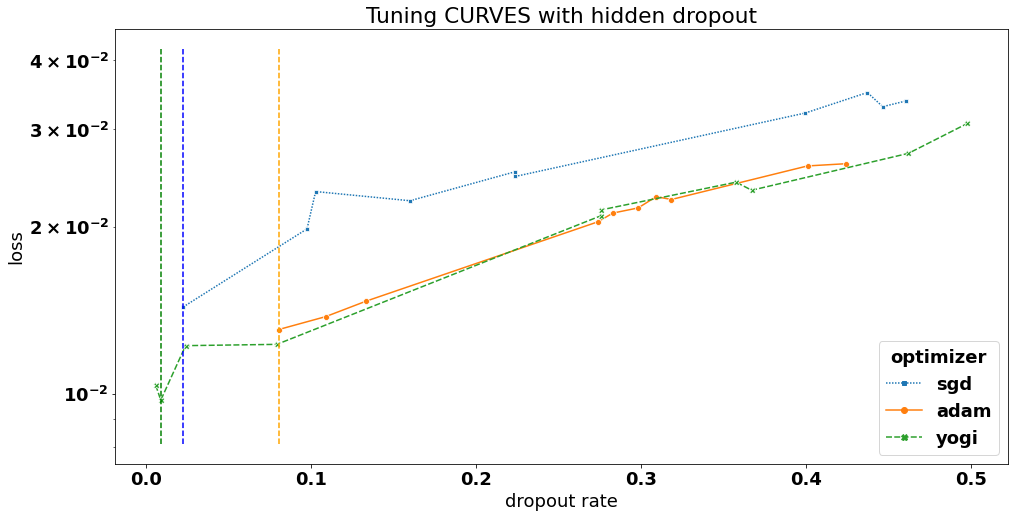

linears dec, OPT adam, min loss 0.0034444315824657 at dropout 0.1211231929438925
linears dec, OPT sgd, min loss 0.0090382080525159 at dropout 0.0300406072371172
linears dec, OPT yogi, min loss 0.0035299938172101 at dropout 0.043016821464176


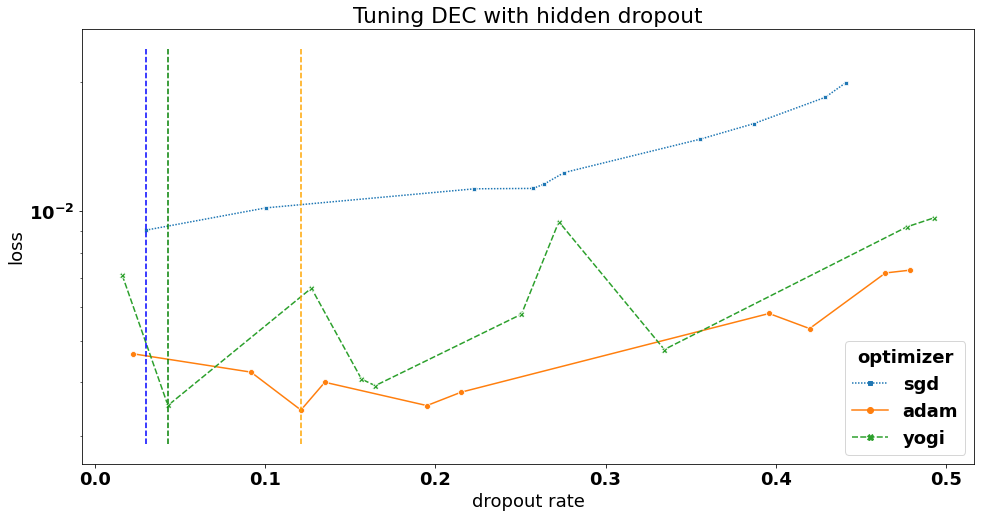

linears google, OPT adam, min loss 0.0031697012018412 at dropout 0.0934170580627212
linears google, OPT sgd, min loss 0.0058605116792023 at dropout 0.0218409376844251
linears google, OPT yogi, min loss 0.0039149397052824 at dropout 0.132571429403897


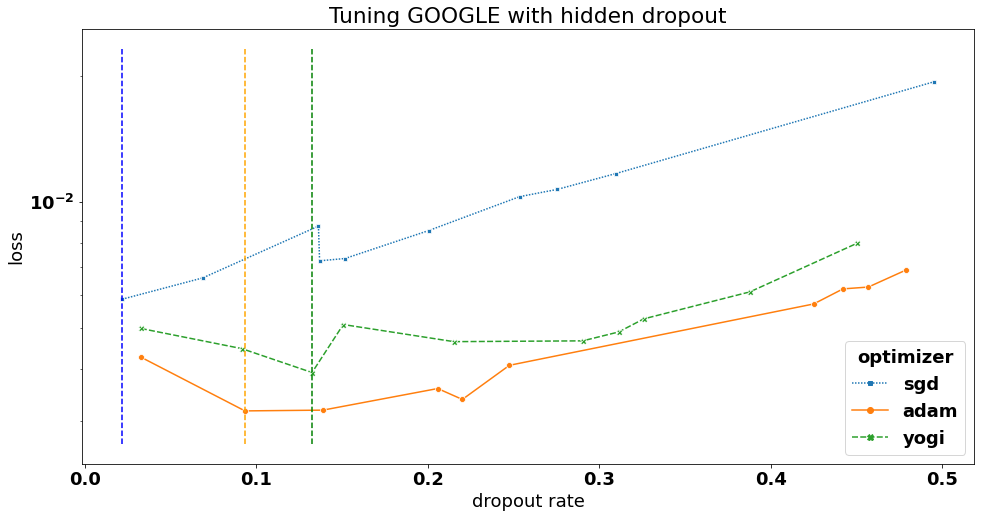

In [6]:
df = pd.read_csv(PATH_TO_CSV/'euromds_ae_hiddo.csv')
df.head()
euromds_best = pd.DataFrame()
columns = ['architecture', 'beta', 'optimizer', 'final reconstruction loss']

i = 0
for linears in np.unique(df['linears']):
    current = df[df['linears'] == linears]
    figure, ax = plt.subplots(1, 1, figsize=(16,8))
    # sns.scatterplot(data=current, x='dropout', y='ray/tune/ae_loss', ax=ax,
    sns.lineplot(data=current, x='dropout', y='ray/tune/ae_loss', ax=ax, markers=True, style='optimizer',
                    hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                    hue_order=list(COLORS_DICT.keys()),
                    )
    for opt in np.unique(current['optimizer']):
        tmp1 = current[(current['optimizer'] == opt) & (current['linears'] == linears)]
        min_row = tmp1.loc[tmp1['ray/tune/ae_loss'].idxmin()]
        x = [min_row['dropout'], min_row['dropout']]
        y = [np.min(current['ray/tune/ae_loss'])/1.2, 1.2*np.max(current['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        # x = [0.0, 0.5]
        # y = [np.min(tmp1['ray/tune/ae_loss']), np.min(tmp1['ray/tune/ae_loss'])]
        # ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        print('linears {}, OPT {}, min loss {} at dropout {}'. \
            format(linears, opt, np.min(tmp1['ray/tune/ae_loss']), min_row['dropout']))
        euromds_best = euromds_best.append(pd.DataFrame([[
            linears.upper(),
            min_row['dropout'],
            opt.upper(),
            np.min(tmp1['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
    ax.set_yscale('log')
    # ax.grid()
    ax.set_xlabel('dropout rate')
    ax.set_ylabel('loss')
    ax.set_title('Tuning {} with hidden dropout'. \
        format(
            linears.upper(),
            ))
    plt.savefig('euromds_{}_hiddo.png'. \
        format(
            linears,
            ))
    plt.show()
    i+=1

plt.show()
euromds_best.round(5).to_csv('euromds_hiddo.csv')

Tuning for input Gaussian noise.

linears curves, OPT adam, min loss 0.0072453888133168 at noising 0.146738180102259
linears curves, OPT sgd, min loss 0.0088168391957879 at noising 0.048558788830511
linears curves, OPT yogi, min loss 0.0078770155087113 at noising 0.1584778102938362


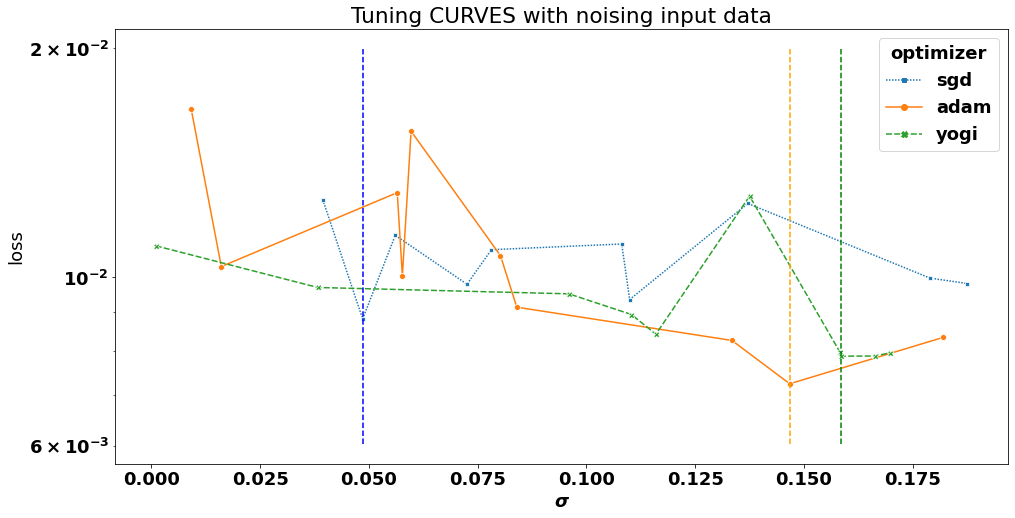

linears dec, OPT adam, min loss 0.0027437321841716 at noising 0.1813389862281109
linears dec, OPT sgd, min loss 0.0030047539621591 at noising 0.0812841866827112
linears dec, OPT yogi, min loss 0.0030902798753231 at noising 0.1792145764878792


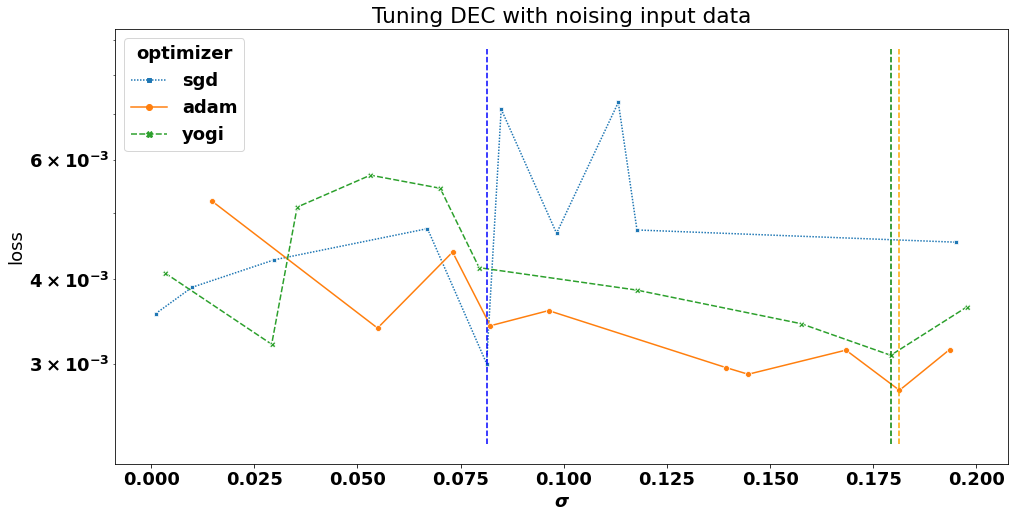

linears google, OPT adam, min loss 0.0025537672918289 at noising 0.1948302186149152
linears google, OPT sgd, min loss 0.0044806315563619 at noising 0.096756560720409
linears google, OPT yogi, min loss 0.0027949730865657 at noising 0.1997804772919489


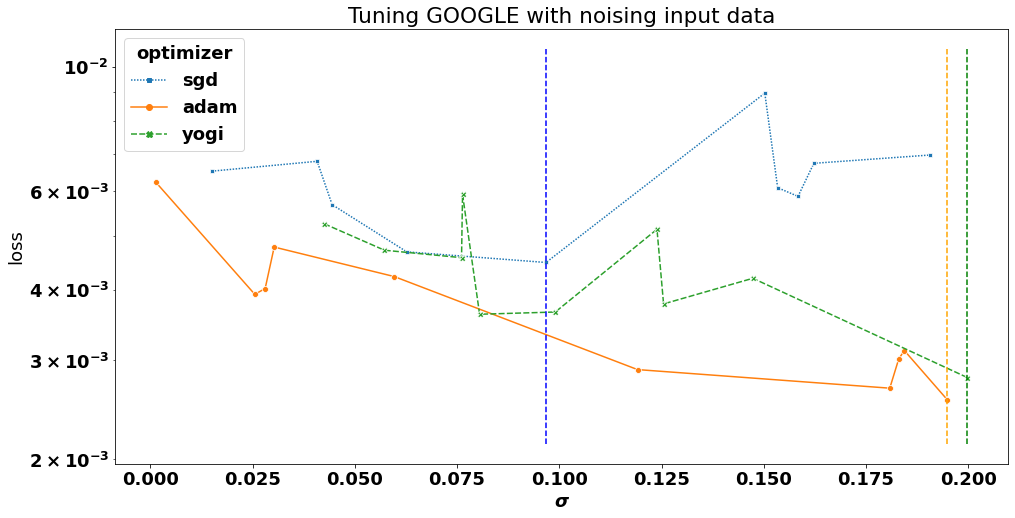

In [7]:
df = pd.read_csv(PATH_TO_CSV/'euromds_ae_gnoise.csv')
df.head()
euromds_best = pd.DataFrame()
columns = ['architecture', 'sigma', 'optimizer', 'final reconstruction loss']

i = 0
for linears in np.unique(df['linears']):
    current = df[df['linears'] == linears]
    figure, ax = plt.subplots(1, 1, figsize=(16,8))
    # sns.scatterplot(data=current, x='noising', y='ray/tune/ae_loss', ax=ax,
    sns.lineplot(data=current, x='noising', y='ray/tune/ae_loss', ax=ax, markers=True, style='optimizer',
                    hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                    hue_order=list(COLORS_DICT.keys()),
                    )
    for opt in np.unique(current['optimizer']):
        tmp1 = current[(current['optimizer'] == opt) & (current['linears'] == linears)]
        min_row = tmp1.loc[tmp1['ray/tune/ae_loss'].idxmin()]
        x = [min_row['noising'], min_row['noising']]
        y = [np.min(current['ray/tune/ae_loss'])/1.2, 1.2*np.max(current['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        # x = [0.0, 0.2]
        # y = [np.min(tmp1['ray/tune/ae_loss']), np.min(tmp1['ray/tune/ae_loss'])]
        # ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        print('linears {}, OPT {}, min loss {} at noising {}'. \
            format(linears, opt, np.min(tmp1['ray/tune/ae_loss']), min_row['noising']))
        euromds_best = euromds_best.append(pd.DataFrame([[
            linears.upper(),
            min_row['noising'],
            opt.upper(),
            np.min(tmp1['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
    ax.set_yscale('log')
    # ax.grid()
    ax.set_xlabel(r'$\sigma$')
    ax.set_ylabel('loss')
    ax.set_title('Tuning {} with noising input data'. \
        format(
            linears.upper(),
            ))
    plt.savefig('euromds_{}_gnoise.png'. \
        format(
            linears,
            ))
    plt.show()
    i+=1

plt.show()
euromds_best.round(5).to_csv('euromds_gnoise.csv')

Tuning for input corruption.

linears curves, OPT adam, min loss 0.0086029339581727 at corruption 0.066884341507342
linears curves, OPT sgd, min loss 0.0137304896488785 at corruption 0.1452976801176246
linears curves, OPT yogi, min loss 0.0092445528134703 at corruption 0.0808269882413079


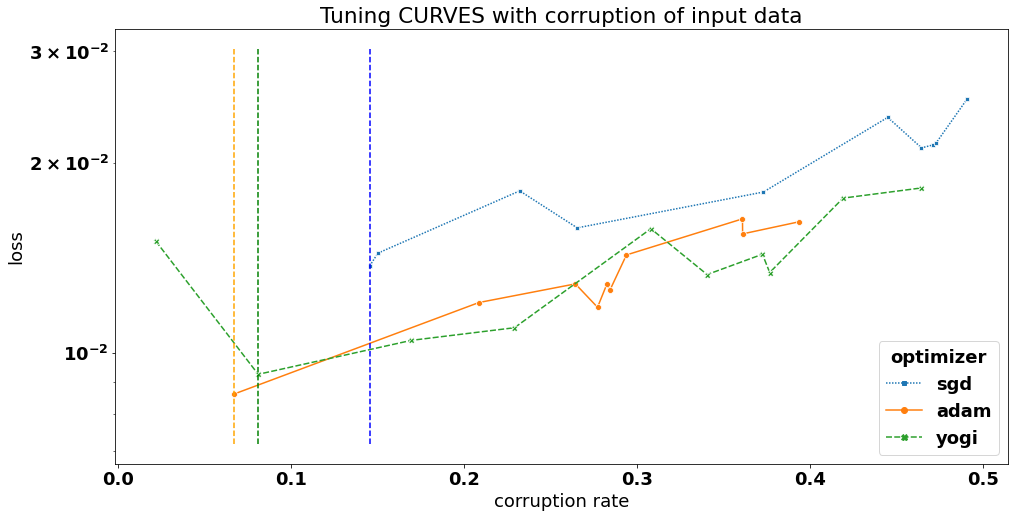

linears dec, OPT adam, min loss 0.0030591448303312 at corruption 0.0806019274696334
linears dec, OPT sgd, min loss 0.0047926469705998 at corruption 0.1192356620641471
linears dec, OPT yogi, min loss 0.0031085025984793 at corruption 0.1696281205744053


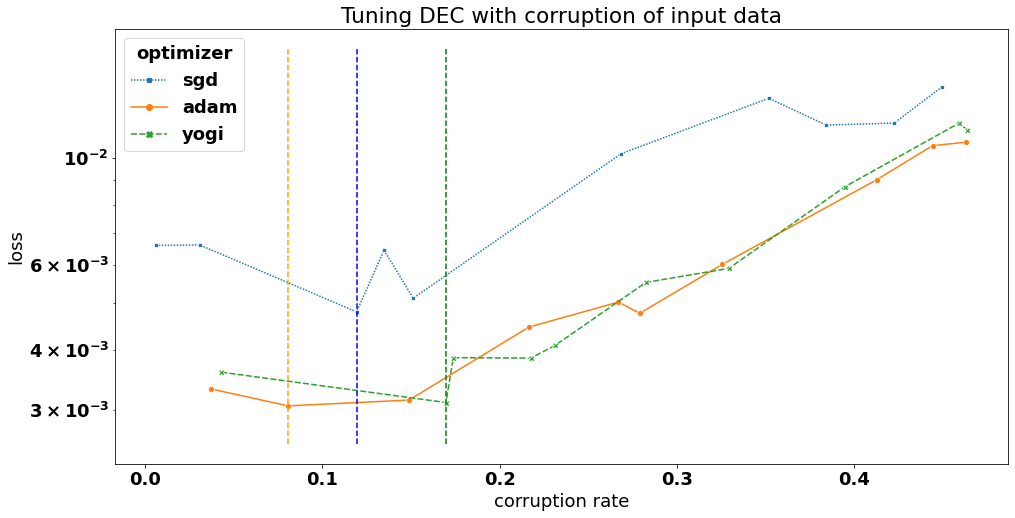

linears google, OPT adam, min loss 0.0034380329307168 at corruption 0.1779712255021112
linears google, OPT sgd, min loss 0.00429382128641 at corruption 0.0757095034586294
linears google, OPT yogi, min loss 0.0033647050149738 at corruption 0.0873911457406352


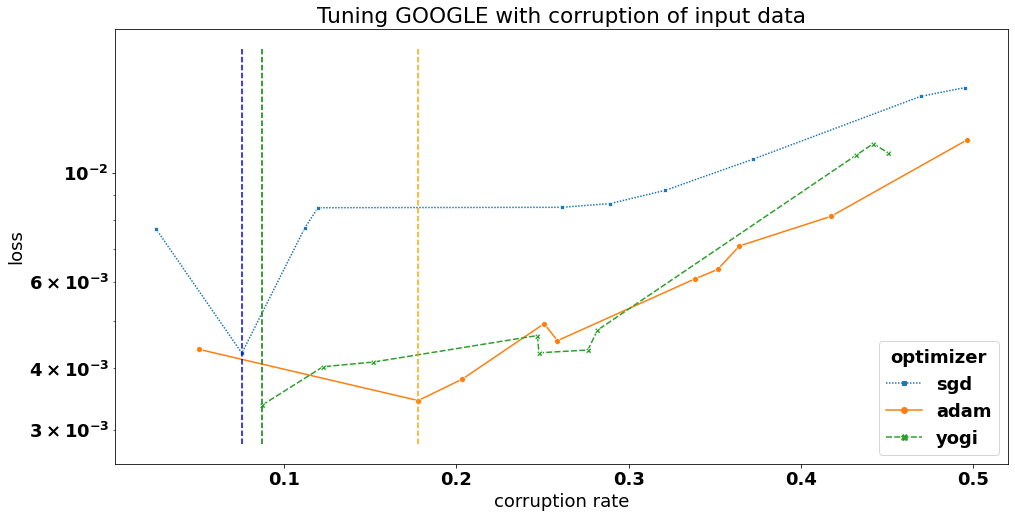

In [8]:
df = pd.read_csv(PATH_TO_CSV/'euromds_ae_corr.csv')
df.head()
euromds_best = pd.DataFrame()
columns = ['architecture', 'corruption', 'optimizer', 'final reconstruction loss']

i = 0
for linears in np.unique(df['linears']):
    current = df[df['linears'] == linears]
    figure, ax = plt.subplots(1, 1, figsize=(16,8))
    # sns.scatterplot(data=current, x='corruption', y='ray/tune/ae_loss', ax=ax,
    sns.lineplot(data=current, x='corruption', y='ray/tune/ae_loss', ax=ax, markers=True, style='optimizer',
                    hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                    hue_order=list(COLORS_DICT.keys()),
                    )
    for opt in np.unique(current['optimizer']):
        tmp1 = current[(current['optimizer'] == opt) & (current['linears'] == linears)]
        min_row = tmp1.loc[tmp1['ray/tune/ae_loss'].idxmin()]
        x = [min_row['corruption'], min_row['corruption']]
        y = [np.min(current['ray/tune/ae_loss'])/1.2, 1.2*np.max(current['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        # x = [0.0, 0.5]
        # y = [np.min(tmp1['ray/tune/ae_loss']), np.min(tmp1['ray/tune/ae_loss'])]
        # ax.plot(x, y, color=COLORS_DICT[opt], linestyle='--')
        print('linears {}, OPT {}, min loss {} at corruption {}'. \
            format(linears, opt, np.min(tmp1['ray/tune/ae_loss']), min_row['corruption']))
        euromds_best = euromds_best.append(pd.DataFrame([[
            linears.upper(),
            min_row['corruption'],
            opt.upper(),
            np.min(tmp1['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
    ax.set_yscale('log')
    # ax.grid()
    ax.set_xlabel('corruption rate')
    ax.set_ylabel('loss')
    ax.set_title('Tuning {} with corruption of input data'. \
        format(
            linears.upper(),
            ))
    plt.savefig('euromds_{}_corr.png'. \
        format(
            linears,
            ))
    plt.show()
    i+=1

plt.show()
euromds_best.round(5).to_csv('euromds_corr.csv')